In [1]:
# Identify and draw box on David
# https://github.com/ageitgey/face_recognition/blob/master/examples/identify_and_draw_boxes_on_faces.py

import face_recognition
import numpy as np
from PIL import Image, ImageDraw

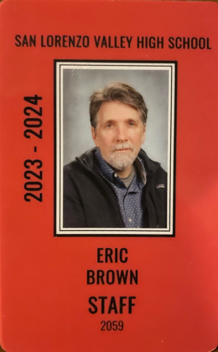

In [2]:
# Load a sample picture and learn how to recognize it.
known_image = face_recognition.load_image_file("../images/ericid.jpeg")
encoding = face_recognition.face_encodings(known_image)[0]

# Load an image with unknown faces
unknown_image = face_recognition.load_image_file("../images/slvms-teachers.jpeg")

pil_image = Image.fromarray(known_image)
pil_image = pil_image.resize((pil_image.size[0]//10, pil_image.size[1]//10))

pil_image.show()

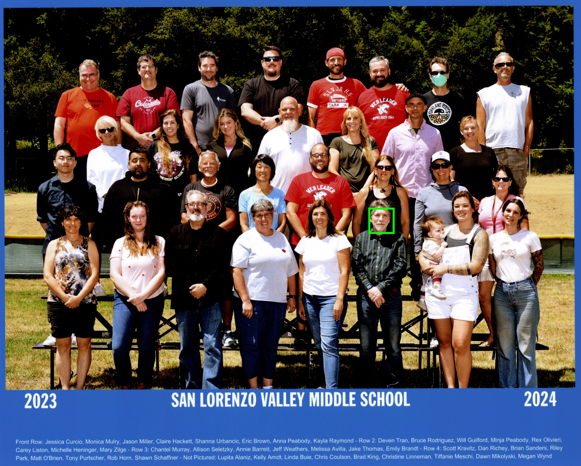

In [3]:
# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)

# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces([encoding], face_encoding)

    # Use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance([encoding], face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:

        # Draw a box around the face using the Pillow module
        draw.rectangle(((left - 20, top - 20), (right + 20, bottom + 20)), outline=(0, 255, 0), width=20)

# Remove the drawing library from memory as per the Pillow docs
del draw

# Shrink the image to a reasonable size (it gets large due to the size of my id)
# If we shrink it, it should show in github
sz = pil_image.size
pil_image = pil_image.resize((sz[0]//10, sz[1]//10))

# Display the resulting image
pil_image.show()